In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./dataset/iris.csv")
data.head()
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [3]:
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns[:-1])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [4]:
# Reduce dimension (PCA)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


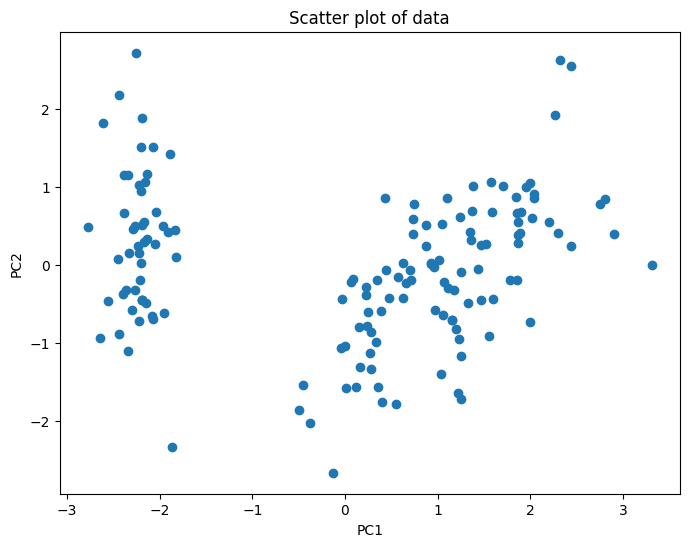

In [5]:
# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

In [6]:
sum_of_squared = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared.append(kmeans.inertia_) # sum of squared distances

e:\3CS-Learn\1204407-ML\Lab\.conda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\3CS-Learn\1204407-ML\Lab\.conda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "e:\3CS-Learn\1204407-ML\Lab\.conda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\3CS-Learn\1204407-ML\Lab\.conda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\3CS-Learn\1204407-ML\Lab\.conda\Lib\subprocess.py", line 1538, in _exec

In [7]:
# Train the model
k_means = KMeans(n_clusters=3)
k_means_model = k_means.fit(X)

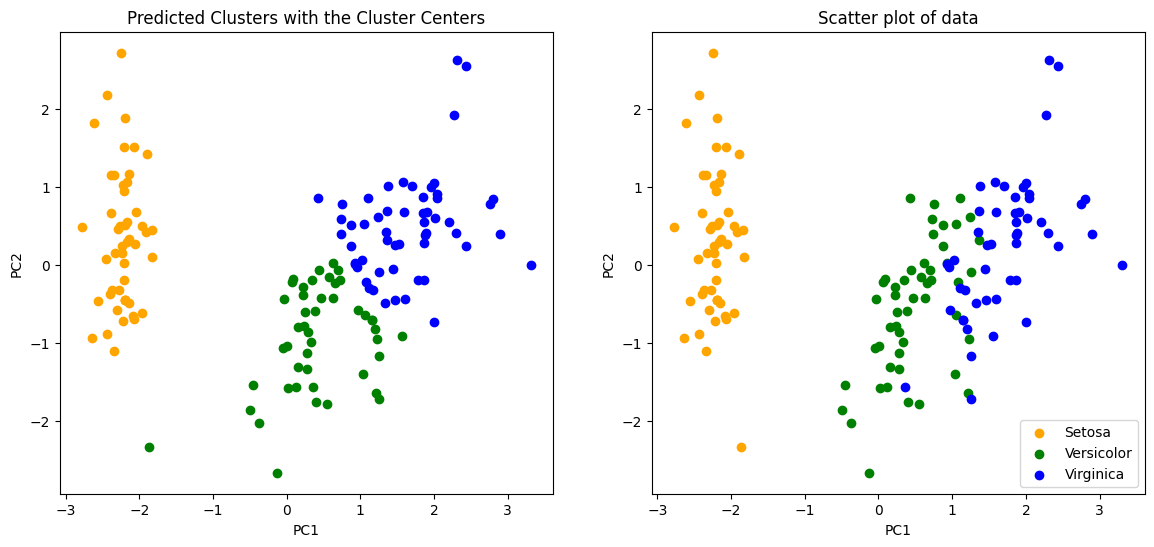

In [8]:
# Evaluate the model
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
pred = k_means_model.predict(X)
colours = ['green', 'orange', 'blue']
for idx in range(3):
    plt.scatter(X[pred == idx]['PC1'], X[pred == idx]['PC2'], c = colours[idx])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Clusters with the Cluster Centers')

# actual
ax2 = fig.add_subplot(122)
plt.scatter(X[y == 'setosa']['PC1'], X[y == 'setosa']['PC2'], c='orange', label='Setosa')
plt.scatter(X[y == 'versicolor']['PC1'], X[y == 'versicolor']['PC2'], c='green', label='Versicolor')
plt.scatter(X[y == 'virginica']['PC1'], X[y == 'virginica']['PC2'], c='blue', label='Virginica')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()


In [17]:
columns = ['setosa', 'versicolor', 'virginica']
# replace with index
y_list = y.replace(columns, [0, 1, 2]).to_numpy()
print(f' ==> [Line 3]: \033[38;2;14;166;211m[y_list]\033[0m({type(y_list).__name__}) = \033[38;2;221;164;39m{y_list}\033[0m')
print(f' ==> [Line 5]: \033[38;2;146;220;13m[pred]\033[0m({type(pred).__name__}) = \033[38;2;163;134;211m{pred}\033[0m')

accuracy = np.mean(pred == y)
print(f' ==> [Line 1]: \033[38;2;205;132;204m[accuracy]\033[0m({type(accuracy).__name__}) = \033[38;2;207;122;115m{accuracy}\033[0m')

 ==> [Line 3]: [y_list](ndarray) = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
 ==> [Line 5]: [pred](ndarray) = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2]
 ==> [Line 1]: [accuracy](float64) = 0.0


C:\Users\MaouNitro\AppData\Local\Temp\ipykernel_8000\1107695686.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_list = y.replace(columns, [0, 1, 2]).to_numpy()


In [10]:
from typing import Tuple


def euclidean_distance(pos1: Tuple[float, float], pos2: Tuple[float, float]) -> float:
  x1, y1 = pos1
  x2, y2 = pos2
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [11]:
class PrintTable:
  def __init__(self, values, captions, widths, aligns):
    if not all([len(values[0]) == len(x) for x in [captions, widths, aligns]]):
      raise Exception()
    self._tablewidth = sum(widths) + 3*(len(captions)-1) + 4
    self._values = values
    self._captions = captions
    self._widths = widths
    self._aligns = aligns

  def print(self):
    self._printTable()

  def _printTable(self):
    formattext_head = ""
    formattext_cell = ""
    for i, v in enumerate(self._widths):
      formattext_head += "{" + str(i) + ":<" + str(v) + "} | "
      formattext_cell += "{" + str(i) + ":" + self._aligns[i] + str(v) + "} | "
    formattext_head = formattext_head[:-3]
    formattext_head = "  " + formattext_head.strip() + "  "
    formattext_cell = formattext_cell[:-3]
    formattext_cell = "  " + formattext_cell.strip() + "  "

    print("-"*self._tablewidth)
    print(formattext_head.format(*self._captions))
    print("-"*self._tablewidth)
    for w in self._values:
      print(formattext_cell.format(*w))
    print("-"*self._tablewidth)

In [12]:
G1 = (1.0, 1.0)
G2 = (5.0, 7.0)
positions = [
    (1, 1),
    (1.5, 2),
    (3, 4),
    (5, 7),
    (3.5, 5),
    (4.5, 5),
    (3.5, 4.5)
]

while True:
  G1_Members = []
  G2_Members = []
  dists = pd.DataFrame(columns=['pos', 'dist1', 'dist2'])
  for pos in positions:
    # print(f' ==> [Line 1]: \033[38;2;170;129;161m[pos]\033[0m({type(pos).__name__}) = \033[38;2;50;139;4m{pos}\033[0m')
    dist1 = euclidean_distance(pos, G1)
    # print(f' ==> [Line 2]: \033[38;2;21;182;226m[dist1]\033[0m({type(dist1).__name__}) = \033[38;2;196;186;188m{dist1}\033[0m')
    dist2 = euclidean_distance(pos, G2)
    # print(f' ==> [Line 4]: \033[38;2;128;218;83m[dist2]\033[0m({type(dist2).__name__}) = \033[38;2;58;106;197m{dist2}\033[0m')
    dists = pd.concat([dists, pd.DataFrame([{'pos': pos, 'dist1': dist1, 'dist2': dist2}])], ignore_index=True)
    if dist1 <= dist2:
      G1_Members.append(pos)
    elif dist1 > dist2:
      G2_Members.append(pos)

  print(f'\033[38;2;106;186;248m=\033[0m'*100)
  print(dists)
  # PrintTable(yourdata, column_captions, column_widths, text_aligns).print()
  # PrintTable(
  #   values=[[str(pos), dist1, dist2] for pos, dist1, dist2 in dists.values],
  #   captions=dists.columns,
  #   widths=[10, 10, 10],
  #   aligns=['^', '^', '^']
  # ).print()

  # print(f' ==> [Line 1]: \033[38;2;47;84;68m[G1_Members]\033[0m({type(G1_Members).__name__}) = \033[38;2;112;184;57m{G1_Members}\033[0m')
  # print(f' ==> [Line 3]: \033[38;2;254;5;170m[G2_Members]\033[0m({type(G2_Members).__name__}) = \033[38;2;36;108;193m{G2_Members}\033[0m')
  # print(f'\033[38;2;106;186;248m=\033[0m'*100)
  G1_X = np.sum([pos[0] for pos in G1_Members]) / len(G1_Members)
  # print(f' ==> [Line 1]: \033[38;2;168;131;172m[G1_X]\033[0m({type(G1_X).__name__}) = \033[38;2;96;103;25m{G1_X}\033[0m')
  G1_Y = np.sum([pos[1] for pos in G1_Members]) / len(G1_Members)
  # print(f' ==> [Line 3]: \033[38;2;7;102;133m[G1_Y]\033[0m({type(G1_Y).__name__}) = \033[38;2;209;235;65m{G1_Y}\033[0m')
  # print(f'\033[38;2;106;186;248m=\033[0m'*100)
  G2_X = np.sum([pos[0] for pos in G2_Members]) / len(G2_Members)
  # print(f' ==> [Line 1]: \033[38;2;168;131;172m[G2_X]\033[0m({type(G2_X).__name__}) = \033[38;2;96;103;25m{G2_X}\033[0m')
  G2_Y = np.sum([pos[1] for pos in G2_Members]) / len(G2_Members)
  # print(f' ==> [Line 3]: \033[38;2;7;102;133m[G2_Y]\033[0m({type(G2_Y).__name__}) = \033[38;2;209;235;65m{G2_Y}\033[0m')
  # print(f'\033[38;2;106;186;248m=\033[0m'*100)

  if G1 == (G1_X, G1_Y) and G2 == (G2_X, G2_Y):
    break

  G1 = (G1_X, G1_Y)
  G2 = (G2_X, G2_Y)

          pos     dist1     dist2
0      (1, 1)  0.000000  7.211103
1    (1.5, 2)  1.118034  6.103278
2      (3, 4)  3.605551  3.605551
3      (5, 7)  7.211103  0.000000
4    (3.5, 5)  4.716991  2.500000
5    (4.5, 5)  5.315073  2.061553
6  (3.5, 4.5)  4.301163  2.915476
          pos     dist1     dist2
0      (1, 1)  1.572330  5.376453
1    (1.5, 2)  0.471405  4.275658
2      (3, 4)  2.034426  1.776584
3      (5, 7)  5.639641  1.845603
4    (3.5, 5)  3.144660  0.728869
5    (4.5, 5)  3.771236  0.530330
6  (3.5, 4.5)  2.733537  1.075291
          pos     dist1     dist2
0      (1, 1)  0.559017  5.021952
1    (1.5, 2)  0.559017  3.920459
2      (3, 4)  3.051639  1.421267
3      (5, 7)  6.656763  2.195450
4    (3.5, 5)  4.160829  0.412311
5    (4.5, 5)  4.776243  0.608276
6  (3.5, 4.5)  3.750000  0.721110


C:\Users\MaouNitro\AppData\Local\Temp\ipykernel_8000\4043410718.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dists = pd.concat([dists, pd.DataFrame([{'pos': pos, 'dist1': dist1, 'dist2': dist2}])], ignore_index=True)
C:\Users\MaouNitro\AppData\Local\Temp\ipykernel_8000\4043410718.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dists = pd.concat([dists, pd.DataFrame([{'pos': pos, 'dist1': dist1, 'dist2': dist2}])], ignore_index=True)
C:\Users\MaouNitro\AppData\Local\Temp\ipykernel_80